## **Importing Libraries**

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings("ignore")

## **Data Loading & Preprocessing**

In [98]:
Matches = pd.read_csv("matches.csv")
Deliveries = pd.read_csv("deliveries.csv")

In [99]:
Matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [100]:
Matches['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [101]:
constant_teams = [
    'Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans',
    'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians',
    'Punjab Kings', 'Rajasthan Royals', 'Royal Challengers Bangalore',
    'Sunrisers Hyderabad'
]

name_mapping = {
    'Kings XI Punjab': 'Punjab Kings',
    'Delhi Daredevils': 'Delhi Capitals',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Gujarat Lions': 'Gujarat Titans'
}

Matches['team1'] = Matches['team1'].apply(lambda x: name_mapping.get(x, x))
Matches['team2'] = Matches['team2'].apply(lambda x: name_mapping.get(x, x))
Matches['toss_winner'] = Matches['toss_winner'].apply(lambda x: name_mapping.get(x, x))
Matches['winner'] = Matches['winner'].apply(lambda x: name_mapping.get(x, x))

Matches = Matches[Matches['team1'].isin(constant_teams) & Matches['team2'].isin(constant_teams)]

Matches = Matches.reset_index(drop=True)

unwanted_columns = ['season', 'match_type', 'super_over', 'umpire1', 'umpire2']
Matches.drop(labels=unwanted_columns, axis=1, inplace=True)

Matches.head()

,id,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,method
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,NaN
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,NaN
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,NaN
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,NaN
4,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Punjab Kings,Punjab Kings,bat,Rajasthan Royals,wickets,6.0,167.0,20.0,NaN


In [102]:
Deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [103]:
constant_teams = [
    'Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans',
    'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians',
    'Punjab Kings', 'Rajasthan Royals', 'Royal Challengers Bangalore',
    'Sunrisers Hyderabad'
]

name_mapping = {
    'Kings XI Punjab': 'Punjab Kings',
    'Delhi Daredevils': 'Delhi Capitals',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Gujarat Lions': 'Gujarat Titans'
}

Deliveries['batting_team'] = Deliveries['batting_team'].apply(lambda x: name_mapping.get(x, x))
Deliveries['bowling_team'] = Deliveries['bowling_team'].apply(lambda x: name_mapping.get(x, x))

Deliveries = Deliveries[Deliveries['batting_team'].isin(constant_teams) & Deliveries['bowling_team'].isin(constant_teams)]

Deliveries = Deliveries.reset_index(drop=True)

unwanted_columns = ['fielder']

Deliveries.drop(labels=unwanted_columns, axis=1, inplace=True)
Deliveries['score'] = Deliveries.groupby(['match_id', 'inning'])['total_runs'].cumsum()

Deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,score
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,1
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,1
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,2
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,2
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,2


## **Exploratory Data Analysis**

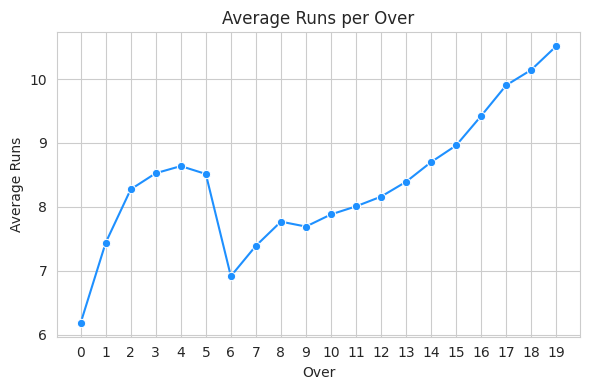

In [112]:
over_end_scores = Deliveries.groupby(['match_id', 'inning', 'over']).last().reset_index()

over_end_scores['over_runs'] = over_end_scores.groupby(['match_id', 'inning'])['score'].diff()
over_end_scores['over_runs'] = over_end_scores['over_runs'].fillna(over_end_scores['score'])

avg_runs_per_over = over_end_scores.groupby('over')['over_runs'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.set_style("whitegrid")
sns.lineplot(data=avg_runs_per_over, x='over', y='over_runs', marker='o', color='dodgerblue')
plt.title("Average Runs per Over")
plt.xlabel("Over")
plt.ylabel("Average Runs")
plt.xticks(avg_runs_per_over['over'])
plt.tight_layout()
plt.show()

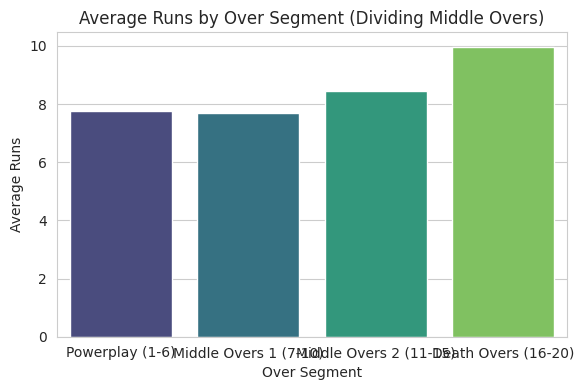

In [111]:
over_end_scores = Deliveries.groupby(['match_id', 'inning', 'over']).last().reset_index()

over_end_scores['over_runs'] = over_end_scores.groupby(['match_id', 'inning'])['score'].diff()
over_end_scores['over_runs'] = over_end_scores['over_runs'].fillna(over_end_scores['score'])

def assign_segment(over):
    if over <= 6:
        return "Powerplay (1-6)"
    elif 7 <= over <= 10:
        return "Middle Overs 1 (7-10)"
    elif 11 <= over <= 15:
        return "Middle Overs 2 (11-15)"
    else:
        return "Death Overs (16-20)"

over_end_scores['over_segment'] = over_end_scores['over'].apply(assign_segment)

avg_runs_segment = over_end_scores.groupby('over_segment')['over_runs'].mean().reset_index()

segment_order = ["Powerplay (1-6)", "Middle Overs 1 (7-10)", "Middle Overs 2 (11-15)", "Death Overs (16-20)"]
avg_runs_segment['over_segment'] = pd.Categorical(avg_runs_segment['over_segment'],
                                                  categories=segment_order, ordered=True)
avg_runs_segment = avg_runs_segment.sort_values('over_segment')

plt.figure(figsize=(6,4))
sns.set_style("whitegrid")
sns.barplot(data=avg_runs_segment, x='over_segment', y='over_runs', palette='viridis')
plt.xlabel("Over Segment")
plt.ylabel("Average Runs")
plt.title("Average Runs by Over Segment (Dividing Middle Overs)")
plt.tight_layout()
plt.show()


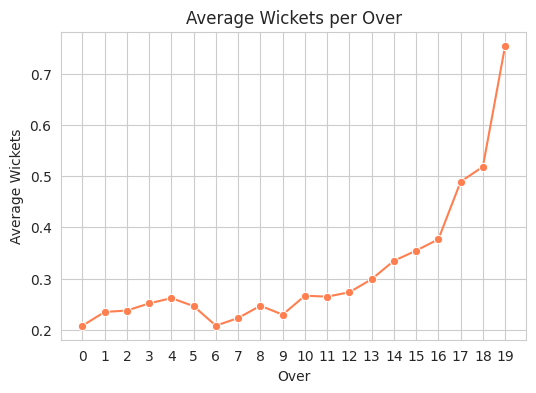

In [110]:
over_wickets = Deliveries.groupby(['match_id', 'inning', 'over'])['is_wicket'].sum().reset_index()
over_wickets.columns = ['match_id', 'inning', 'over', 'wickets_in_over']

avg_wickets = over_wickets.groupby('over')['wickets_in_over'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")
sns.lineplot(data=avg_wickets, x='over', y='wickets_in_over', marker='o', color='coral')
plt.title("Average Wickets per Over")
plt.xlabel("Over")
plt.ylabel("Average Wickets")
plt.xticks(avg_wickets['over'])
plt.show()

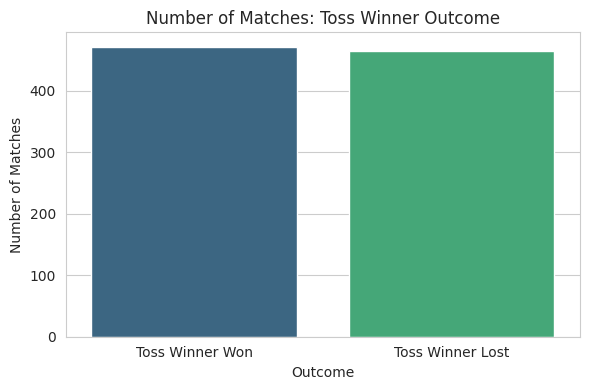

In [76]:
Matches['toss_match_win'] = Matches['toss_winner'] == Matches['winner']

result_counts = Matches['toss_match_win'].value_counts().reset_index()
result_counts.columns = ['Outcome', 'Count']

result_counts['Outcome'] = result_counts['Outcome'].map({True: 'Toss Winner Won', False: 'Toss Winner Lost'})

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=result_counts, x='Outcome', y='Count', palette='viridis')
plt.title("Number of Matches: Toss Winner Outcome")
plt.xlabel("Outcome")
plt.ylabel("Number of Matches")
plt.tight_layout()
plt.show()

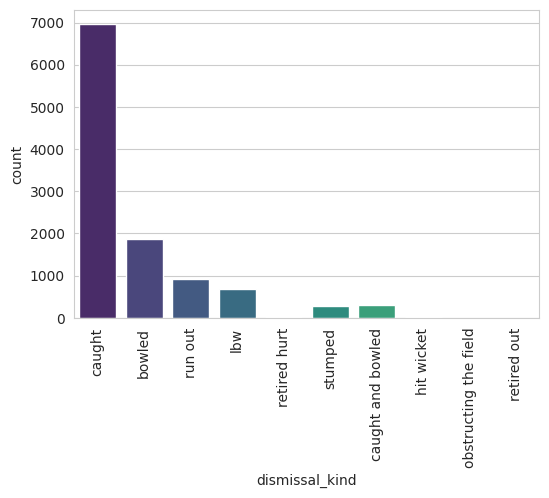

In [77]:
plt.figure(figsize=(6,4))
sns.countplot(x='dismissal_kind', data=Deliveries, palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

**Franchise Analysis**

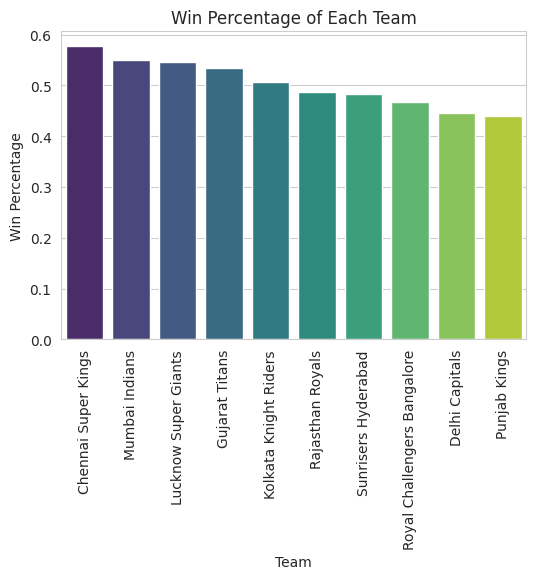

In [78]:
team_wins = Matches['winner'].value_counts()
team_matches = Matches['team1'].value_counts() + Matches['team2'].value_counts()
win_percentage = (team_wins / team_matches).sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=win_percentage.index, y=win_percentage.values,palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.title('Win Percentage of Each Team')
plt.show()

**Top Players**

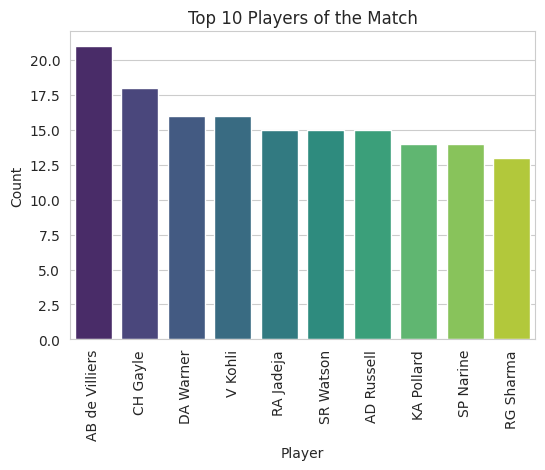

In [79]:
plt.figure(figsize=(6, 4))

top_players = Matches['player_of_match'].value_counts().head(10)

sns.barplot(x=top_players.index, y=top_players.values,palette='viridis')

plt.xticks(rotation=90)

plt.xlabel('Player')
plt.ylabel('Count')

plt.title('Top 10 Players of the Match')

plt.show()

**Batsmen Analysis**

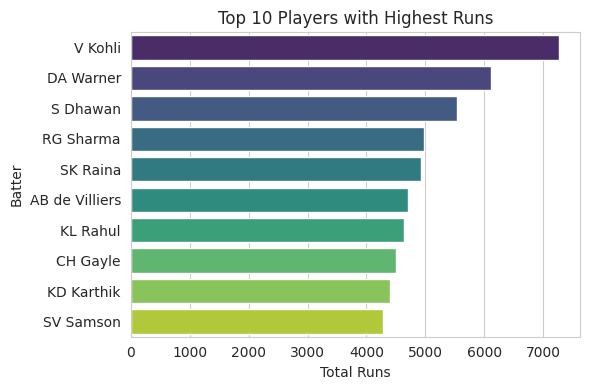

In [80]:
runs_df = Deliveries.groupby('batter')['batsman_runs'].sum().reset_index()

top10 = runs_df.sort_values(by='batsman_runs', ascending=False).head(10)

plt.figure(figsize=(6, 4))
sns.barplot(x='batsman_runs', y='batter', data=top10, palette='viridis')
plt.title("Top 10 Players with Highest Runs")
plt.xlabel("Total Runs")
plt.ylabel("Batter")
plt.tight_layout()
plt.show()

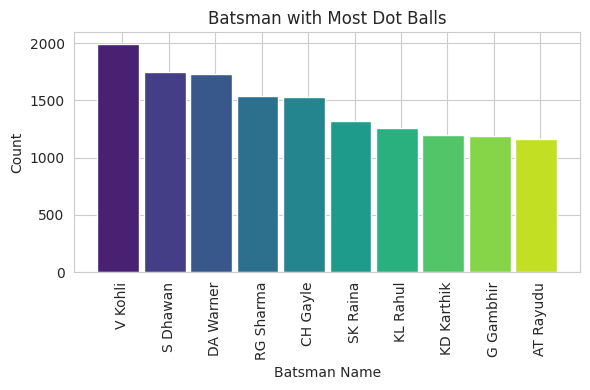

In [81]:
temp_df = Deliveries.groupby('batter')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index()
temp_df = temp_df.sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10, :]

labels = np.array(temp_df['batter'])
ind = np.arange(len(labels))
width = 0.9

colors = sns.color_palette('viridis', len(labels))

fig, ax = plt.subplots(figsize=(6, 4))
rects = ax.bar(ind, temp_df['batsman_runs'], width=width, color=colors)
ax.set_xticks(ind + width/10.)
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with Most Dot Balls")
ax.set_xlabel("Batsman Name")
plt.tight_layout()
plt.show()

**Bowler Analysis**

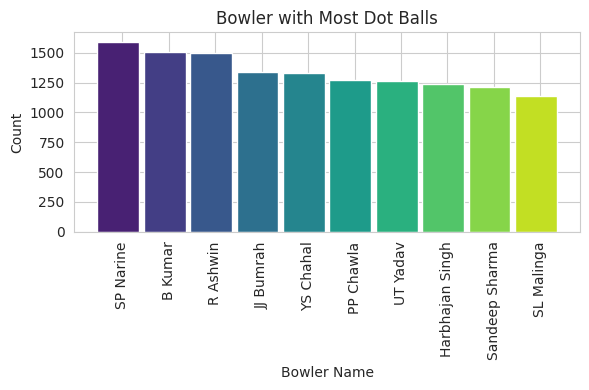

In [82]:
temp_df = Deliveries.groupby('bowler')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index()
temp_df = temp_df.sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10, :]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9

colors = sns.color_palette('viridis', len(labels))

fig, ax = plt.subplots(figsize=(6, 4))
rects = ax.bar(ind, temp_df['batsman_runs'], width=width, color=colors)
ax.set_xticks(ind + width/10.)
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowler with Most Dot Balls")
ax.set_xlabel("Bowler Name")
plt.tight_layout()
plt.show()